In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])

#No. of neurons in each layer
n_x = 2 #Input-Layer
n_y = 1 #Output-Layer
n_h = 2 #Hidden-Layer

m = x.shape[1]
lr = 0.1 #Learning Rate
np.random.seed(2)
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer (x to hidden)
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer (hidden to y)
losses = []

In [3]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

In [4]:
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)   #y1 - Summing junction for hidden layer (v1.w1+v2.w1)
    a1 = sigmoid(z1)    #Hidden layer activation function - phi(.)

    z2 = np.dot(w2,a1) #y3 - Summing junction for output layer (v3.w3)
    a2 = sigmoid(z2)   #Output layer activation function - phi(.)
    return z1,a1,z2,a2

In [5]:
def back_prop(m,w1,w2,z1,a1,z2,a2,y):    
    dz2 = a2-y  #Calculating error actual - desired

    dw2 = np.dot(dz2,a1.T)/m  #adjusting output layer weight matrix
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1) #adjusting output layer

    dw1 = np.dot(dz1,x.T)/m  #adjusting hidden layer weight matrix

    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

In [6]:
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)

    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

Text(0, 0.5, 'Loss value')

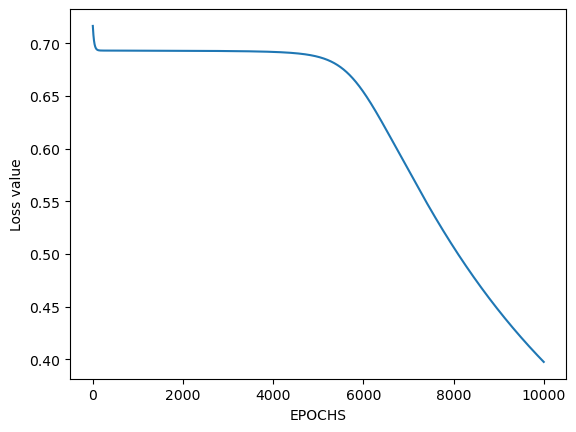

In [7]:
# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [8]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print( [i[0] for i in input], 1)
    else:
        print( [i[0] for i in input], 0)

print('Input',' Output')
test=np.array([[0],[0]])
predict(w1,w2,test)
test=np.array([[0],[1]])
predict(w1,w2,test)
test=np.array([[1],[0]])
predict(w1,w2,test)
test=np.array([[1],[1]])
predict(w1,w2,test)

Input  Output
[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0
